/tmp/ipykernel_5935/3358327448.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('inferno')


<Figure size 7680x5760 with 0 Axes>

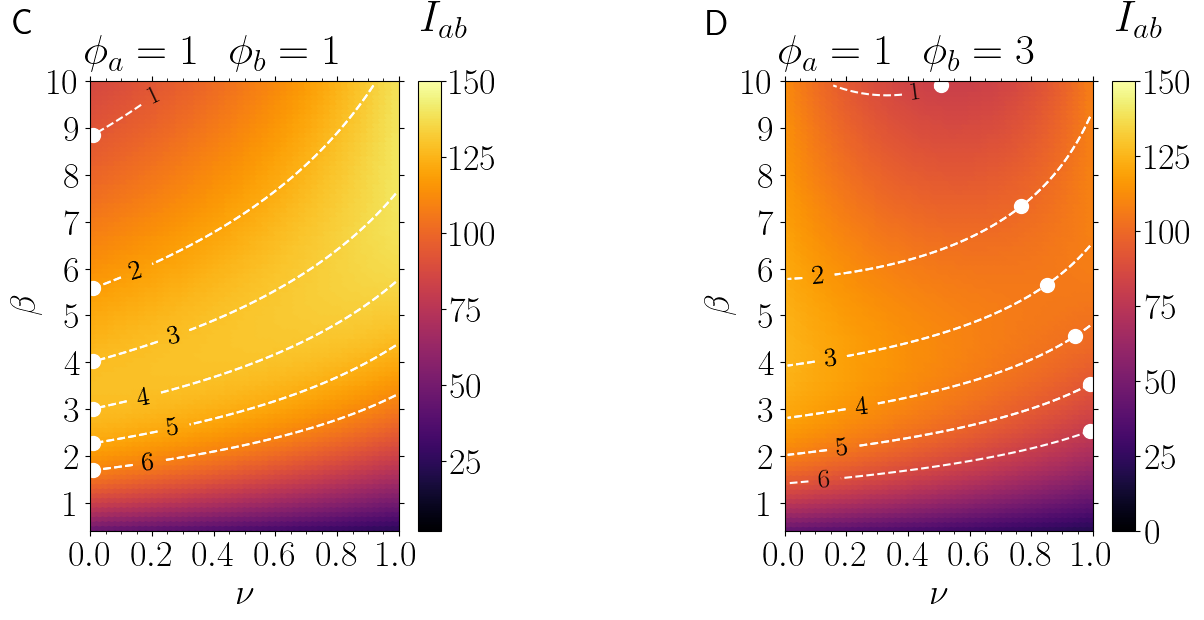

In [7]:
#------------------------------------------------
#---------Project Conjugate Diffusion------------
#------------Version February 2023----------------
#----BM=1-and constants adjusted from Frazier----
#---This program calculates the time integrals---
#---integrals of amp and bac with the boundary---
#------conditions: fib for the bm1,2 and fia-----
#------for the a(0), the time delay is fia-------
#------------------------------------------------


import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as tck


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


#https://matplotlib.org/3.5.0/gallery/subplots_axes_and_figures/colorbar_placement.html
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=1200)

cm = plt.cm.get_cmap('inferno')

#-----------------------------------
#-----------------------------------


fig = plt.figure(figsize=(6, 6))


plt.rcParams['text.usetex'] = True  #enable using LaTeX in matplotlib
plt.rcParams.update({'font.size': 26})


#-----------------------------------

ax = fig.add_subplot(221)



#-------read int amp/ int beta
contour_data12 = pd.read_table("bac11.dat") #, sep="\t", usecols =["X","Y","Z"])
#contour_data12['Z'] = np.log10(contour_data12['Z'])



Z12 = contour_data12.pivot_table(index='X', columns='Y', values='Z').T.values

X_unique12 = np.sort(contour_data12.X.unique())
Y_unique12 = np.sort(contour_data12.Y.unique())
X12, Y12 = np.meshgrid(X_unique12, Y_unique12)

#--now we call CS to delimit the contours that will appear in the figure--> it must be before the scatterplot!
CS = plt.contour(X12, Y12,Z12,levels=[2,3,4,5,6],colors='white',linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=20,colors='black')
#CS1 = plt.contour(X12, Y12,Z12,levels=[1],colors='white',linestyles='dashed')
#plt.clabel(CS1, inline=1, fontsize=20,colors='white')


#plt.scatter(X12, Y12, c=Z12, vmin=0, vmax=4, s=50, cmap=cm)
#plt.xticks(np.arange(0, 1.2, step=0.2))
#plt.yticks(np.arange(0, 10.2, step=.4))
#plt.xlabel(r' $\nu$')
#plt.ylabel(r' $\beta$')
#plt.title(r'$ \phi_a=1 \:\:\: \phi_b=1$',y=1.02,x=0.4)
#cb = plt.colorbar()
#cb.set_label(r'$ \int_0^{24} b_0 dt$ ', labelpad=10, y=1.2,rotation=0,fontsize=32)
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0.4, 10.01)
#ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
#ax.xaxis.set_ticks_position('both')
#ax.yaxis.set_ticks_position('both')
#-----------------------------------
#ax = fig.add_subplot(222)

contour_data13 =pd.read_table("prod11.dat")
#contour_data13['Z'] = np.log10(contour_data13['Z'])

Z13 = contour_data13.pivot_table(index='X', columns='Y', values='Z').T.values

X_unique13 = np.sort(contour_data13.X.unique())
Y_unique13 = np.sort(contour_data13.Y.unique())
X13, Y13 = np.meshgrid(X_unique13, Y_unique13)



#CS1 = plt.contour(X12, Y12,Z12,levels=[np.log10(1)],colors='white',linestyles='dashed')

#p1 = CS1.collections[0].get_paths()[0]
#coor_p1 = p1.vertices
#based on the array generated for the contour path, get the min y--this is coming from the int b0 dt
#y_min = coor_p1.min(axis=0)[1]
#with y_min obtained, find the position, x_min, where it occurs
#rp1=coor_p1[np.where(coor_p1[:,1]==y_min)]

#----call back the contours from bacteria----
#--------------
CS1 = plt.contour(X12, Y12,Z12,levels=[1],colors='white',linestyles='dashed')
plt.clabel(CS1, inline=1, fontsize=18,colors='black')

CS2 = plt.contour(X12, Y12,Z12,levels=[2],colors='white',linestyles='dashed')
plt.clabel(CS2, inline=1, fontsize=20,colors='black')

CS6 = plt.contour(X12, Y12,Z12,levels=[3],colors='white',linestyles='dashed')                                      
plt.clabel(CS6, inline=1, fontsize=20,colors='black')

CS12 = plt.contour(X12, Y12,Z12,levels=[4],colors='white',linestyles='dashed') 
plt.clabel(CS12, inline=1, fontsize=20,colors='black')
  
CS24 = plt.contour(X12, Y12,Z12,levels=[5],colors='white',linestyles='dashed')
plt.clabel(CS24, inline=1, fontsize=20,colors='black')

CS48 = plt.contour(X12, Y12,Z12,levels=[6],colors='white',linestyles='dashed')
plt.clabel(CS48, inline=1, fontsize=20,colors='black')                                      



plt.scatter(X13, Y13, c=Z13, vmin=2, vmax=150, s=50, cmap=cm)
plt.xlabel(r' $\nu$')
plt.ylabel(r' $\beta$')
plt.title(r'$ \phi_a=1 \:\:\: \phi_b=1$',y=1.02,x=0.4)
cb = plt.colorbar()
cb.set_label(r'$ I_{ab} $ ', labelpad=-40, y=1.18,rotation=0,fontsize=32)
#plt.scatter(rp1[:,0],rp1[:,1],marker="o",s=100,color='white')
plt.scatter(0.01,8.85794,marker="o",s=100,color='white')
plt.scatter(0.01,5.58163,marker="o",s=100,color='white')
plt.scatter(0.01,4.01507,marker="o",s=100,color='white')
plt.scatter(0.01,3.00665,marker="o",s=100,color='white')
plt.scatter(0.01,2.27043,marker="o",s=100,color='white')
plt.scatter(0.01,1.693,marker="o",s=100,color='white')

#plt.clabel(CS2, inline=1, fontsize=20,colors='black')
#plt.clabel(CS6, inline=1, fontsize=20,colors='black')
#plt.clabel(CS12, inline=1, fontsize=20,colors='black')
#plt.clabel(CS24, inline=1, fontsize=20,colors='black')

plt.xticks(np.arange(0, 1.2, step=0.2))
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylim(0.4, 10.01)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


#-----------------------------------

#ax = fig.add_subplot(223)
#contour_data22 = pd.read_table("bac16.dat") #, sep="\t", usecols =["X","Y","Z"])contour_data22['Z'] = np.log10(contour_data22['Z'])
#contour_data22['Z'] = np.log10(contour_data22['Z'])

#Z22 = contour_data22.pivot_table(index='X', columns='Y', values='Z').T.values

#X_unique22 = np.sort(contour_data22.X.unique())
#Y_unique22 = np.sort(contour_data22.Y.unique())
#X22, Y22 = np.meshgrid(X_unique22, Y_unique22)

#--now we call CS to delimit the contours that will appear in the figure--> it must be before the scatterplot!
#CS = plt.contour(X22, Y22,Z22,levels=[2,3,4,5],colors='white',linestyles='dashed')#I took out the 48h because it occured at beta<0.25
#plt.clabel(CS, inline=1, fontsize=20,colors='black')

#CS1 = plt.contour(X22, Y22,Z22,levels=[1],colors='white',linestyles='dashed')#I took out the 48h because it occured at beta<0.25
#plt.clabel(CS1, inline=1, fontsize=20,colors='white')


#plt.scatter(X22, Y22, c=Z22, vmin=0, vmax=4, s=50, cmap=cm)
#plt.xticks(np.arange(0, 1.2, step=0.2))
#plt.yticks(np.arange(0.25, 4, step=0.4))
#plt.xlabel(r' $\nu$')
#plt.ylabel(r' $\beta$')
#plt.title(r'$ \phi_a=1 \:\:\: \phi_b=6$',y=1.02,x=0.4)
#cb = plt.colorbar()
#cb.set_label(r'$ \int_0^{24} b_0 dt$ ', labelpad=10, y=1.2,rotation=0,fontsize=32)
#cb.set_label('C', labelpad=-350, y=1.2,rotation=0,fontsize=32)
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0.4, 10.01)

#ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
#ax.xaxis.set_ticks_position('both')
#ax.yaxis.set_ticks_position('both')


#-----------------------------------
ax = fig.add_subplot(222)

contour_data22 = pd.read_table("bac13.dat") #, sep="\t", usecols =["X","Y","Z"])contour_data22['Z'] = np.log10(contour_data22['Z'])
#contour_data22['Z'] = np.log10(contour_data22['Z'])

Z22 = contour_data22.pivot_table(index='X', columns='Y', values='Z').T.values

X_unique22 = np.sort(contour_data22.X.unique())
Y_unique22 = np.sort(contour_data22.Y.unique())
X22, Y22 = np.meshgrid(X_unique22, Y_unique22)

#--now we call CS to delimit the contours that will appear in the figure--> it must be before the scatterplot!
CS = plt.contour(X22, Y22,Z22,levels=[2,3,4,5,6],colors='white',linestyles='dashed')#I took out the 48h because it occured at beta<0.25
plt.clabel(CS, inline=1, fontsize=20,colors='black')

#CS1 = plt.contour(X22, Y22,Z22,levels=[1],colors='white',linestyles='dashed')#I took out the 48h because it occured at beta<0.25
#plt.clabel(CS1, inline=1, fontsize=20,colors='white')




df01=pd.read_table("prod13.dat")
contour_data23 =df01
#contour_data23['Z'] = np.log10(contour_data23['Z'])

Z23 = contour_data23.pivot_table(index='X', columns='Y', values='Z').T.values

X_unique23 = np.sort(contour_data23.X.unique())
Y_unique23 = np.sort(contour_data23.Y.unique())
X23, Y23 = np.meshgrid(X_unique23, Y_unique23)

#--now we call CS to delimit the contours that will appear in the figure--> it must be before the scatterplot!
#this contour correspond to the int b(0)dt
CS1 = plt.contour(X22, Y22,Z22,levels=[1],colors='white',linestyles='dashed')
plt.clabel(CS1, inline=1, fontsize=18,colors='black')

CS6 = plt.contour(X22, Y22,Z22,levels=[2],colors='white',linestyles='dashed')
plt.clabel(CS6, inline=1, fontsize=20,colors='black')

CS12 = plt.contour(X22, Y22,Z22,levels=[3],colors='white',linestyles='dashed') 
plt.clabel(CS12, inline=1, fontsize=20,colors='black')
    

CS24 = plt.contour(X22, Y22,Z22,levels=[4],colors='white',linestyles='dashed')
plt.clabel(CS24, inline=1, fontsize=20,colors='black')

CS48 = plt.contour(X22, Y22,Z22,levels=[5],colors='white',linestyles='dashed') 
plt.clabel(CS48, inline=1, fontsize=20,colors='black')

#p48 = CS48.collections[0].get_paths()[0]
#coor_p48 = p48.vertices
#based on the array generated for the contour path, get the min y--this is coming from the int b0 dt
#y_min = coor_p48.min(axis=0)[1]
#with y_min obtained, find the position, x_min, where it occurs
#rp48=coor_p48[np.where(coor_p48[:,1]==y_min)]


plt.scatter(X23, Y23, c=Z23, vmin=0, vmax=150, s=70, cmap=cm)
plt.xlabel(r' $\nu$')
plt.ylabel(r' $\beta$')
plt.title(r'$ \phi_a=1 \:\:\: \phi_b=3$',y=1.02,x=0.4)
cb = plt.colorbar()
#cb.set_label(r' $ \int a_0 dt \int b_0 dt $ ', labelpad=-35, y=1.2,rotation=0,fontsize=32)
cb.set_label(r'$ I_{ab} $ ', labelpad=-40, y=1.18,rotation=0,fontsize=32)
plt.scatter(0.508527,9.91,marker="o",s=100,color='white')
plt.scatter(0.766592,7.32704,marker="o",s=100,color='white')
plt.scatter(0.85,5.65556,marker="o",s=100,color='white')
plt.scatter(0.941124,4.55438,marker="o",s=100,color='white')
plt.scatter(0.99,3.52935,marker="o",s=100,color='white')
plt.scatter(0.99,2.52964,marker="o",s=100,color='white')

#plt.scatter(rp48[:,0],rp48[:,1],marker="o",s=100,color='blue')
plt.xticks(np.arange(0, 1.2, step=0.2))
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylim(0.4, 10.01)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

#ax.tick_params(axis='both', which='major', labelsize=32)
#ax.tick_params(axis='both', which='minor', labelsize=32)



#-----------------------------------

#plt.text(1, 2.6, 'A', fontsize = 22)
#plt.text(-2.1, 24.8, 'A')
#plt.text(-1.6, 24.8, 'Bacterial load')

#plt.text(0.3, 24.8, 'Cost to host')
#plt.text(-0.2, 24.8, 'B')

plt.text(-2.5, 11, 'A')
plt.text(-0.25, 11, 'B')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.9, 
                    top=1.9, 
                    wspace=0.8,     #<---horizonta,inter-columns, space
                    hspace=0.4)    #<---vertical, inter-rows, space




plt.savefig('fig3.png', bbox_inches="tight",transparent=True)

plt.show()


In [5]:
plt.show()  
plt.savefig('fig4.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.savefig('line_plot.pdf')  